## general importing - geopandas, fiona, shapely, osmnx

In [1]:
import geojson
import geopandas as gpd
from fiona.crs import from_epsg
import os, json
from shapely.geometry import shape, Point, Polygon, MultiPoint
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import osmnx as ox

## retrieve and map transportation network

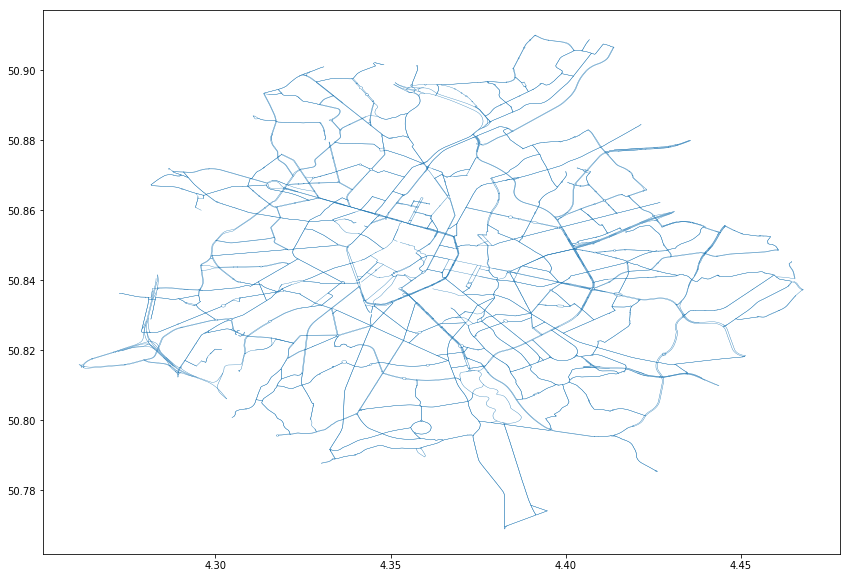

In [12]:
ECKERT_IV_PROJ4_STRING = "+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"

graph=ox.graph_from_place('Brussels-Capital, Belgium', network_type= 'none', infrastructure=' way[highway~"^(motorway|trunk|primary|secondary|tertiary)"]')
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

edges_meter = edges.to_crs(ECKERT_IV_PROJ4_STRING)
edges_meter=edges_meter.geometry.buffer(4.5) #[edges_meter.geometry.length>250]
edges_meter=edges_meter.to_crs({'init' :'epsg:4326'})

streets_net=gpd.GeoDataFrame(edges_meter.geometry) #[edges_meter.geometry.length>300].buffer(5)
streets_net.columns=['geometry']
streets_net.crs = {'init' :'epsg:4326'}


streets_net.plot(figsize=(20,10))

## save geojson file

In [13]:
streets_net.to_file('Brussels.json',driver='GeoJSON')

In [14]:
# numbers of streets segments retrieved
streets_net.shape

(4763, 1)

## read geojson file

In [15]:
street_segments=gpd.read_file('Brussels.json')
street_segments_one = gpd.GeoDataFrame(street_segments.iloc[2]).T

street_segments.head()

,geometry
0,"POLYGON ((4.310545664831201 50.8656817648822, ..."
1,"POLYGON ((4.310638263518718 50.86559448970853,..."
2,"POLYGON ((4.450411249949658 50.85328005423661,..."
3,"POLYGON ((4.450492885061278 50.85324728612067,..."
4,"POLYGON ((4.411845421352249 50.87672195269334,..."


## map in folium for visulaization

In [ ]:
street_segments.crs = from_epsg(4326)

import folium
import folium as cm


m = folium.Map(location = [50.847436,4.350382], tiles='cartodbpositron', zoom_start = 11)

folium.GeoJson(street_segments).add_to(m)

folium.LayerControl().add_to(m)

m